In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import sklearn
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train.csv")
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
# shape of training set
print("%d rows and %d cols"%(train.shape[0], train.shape[1]))

595212 rows and 59 cols


In [5]:
train.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Catagories and Missing Values

features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc).

bin - binary features

cat - categorical features

-1 -missing from the observation

In [85]:
train_with_nan = train.replace(-1, np.NaN)

In [86]:
train_y = train.target.as_matrix()
train_X = train.drop("id",1).drop("target",1).as_matrix()

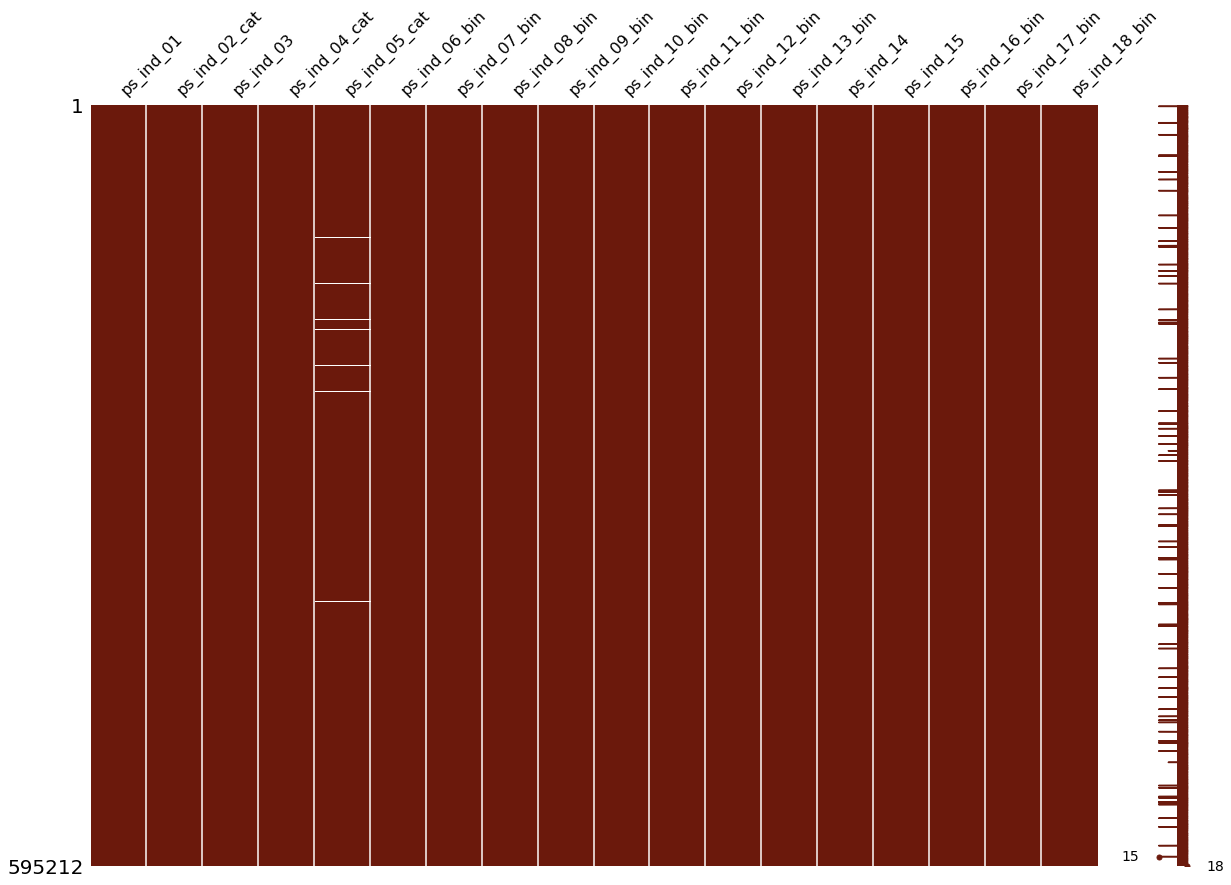

In [88]:
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=train_with_nan.iloc[:,2:20], figsize=(20, 14), color=(0.42, 0.1, 0.05))

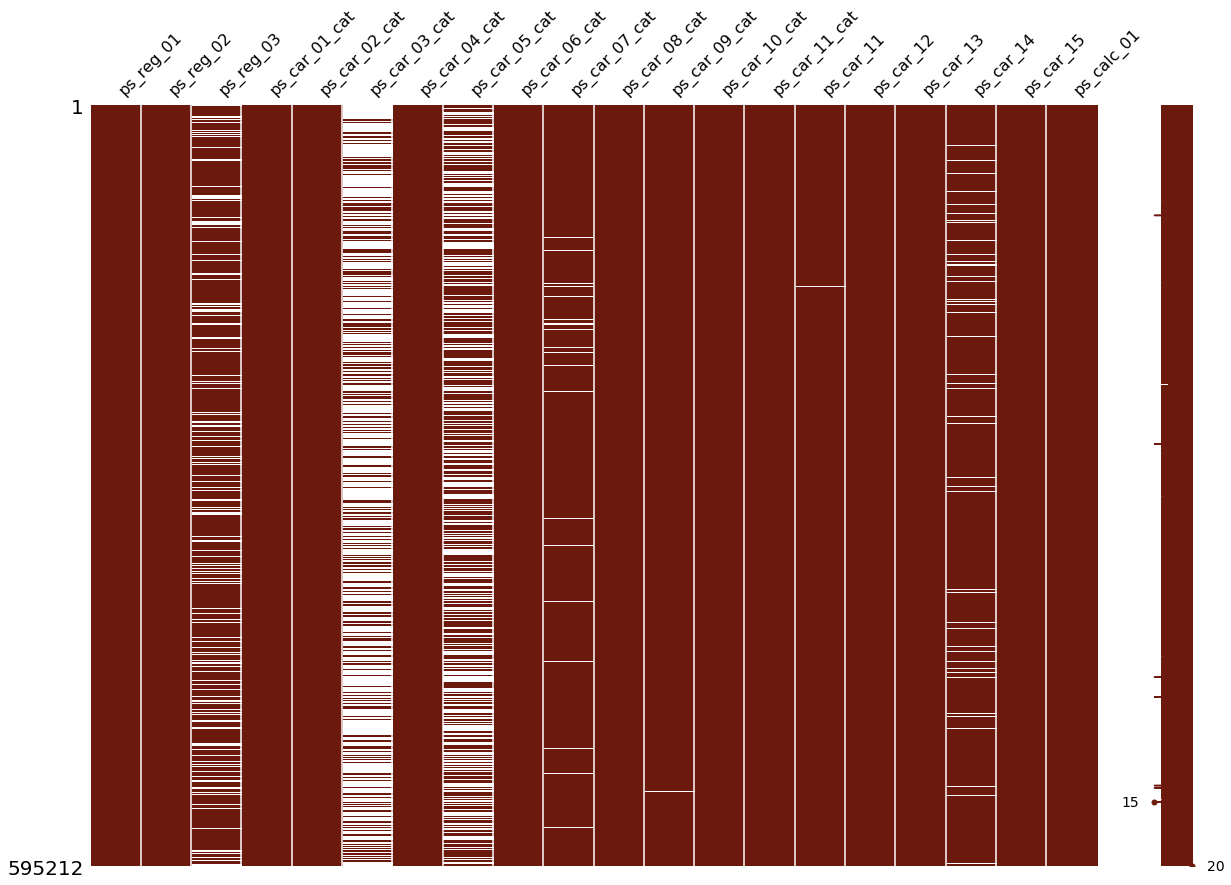

In [89]:
msno.matrix(df=train_with_nan.iloc[:,20:40], figsize=(20, 14), color=(0.42, 0.1, 0.05))

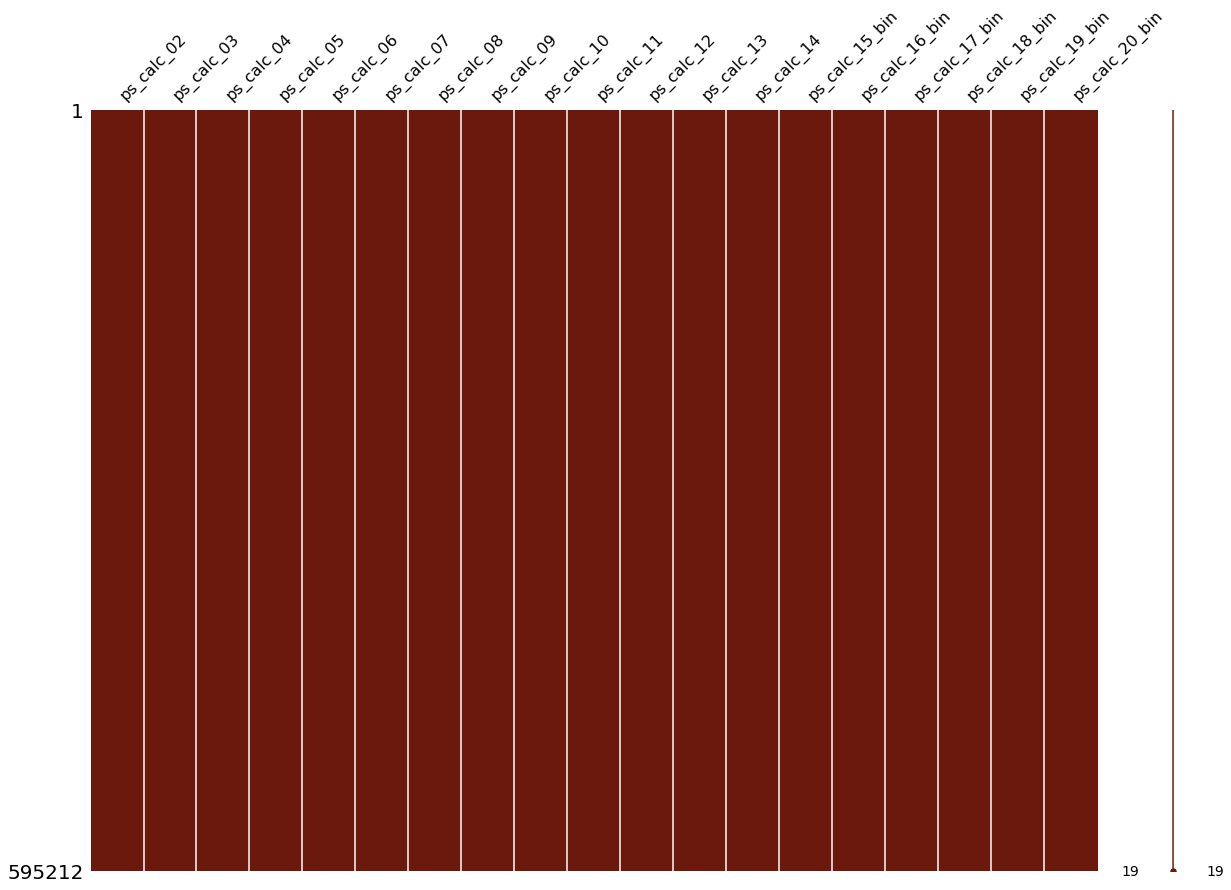

In [90]:
msno.matrix(df=train_with_nan.iloc[:,40:60], figsize=(20, 14), color=(0.42, 0.1, 0.05))

In [91]:
train_with_nan.isnull().any()

id                False
target            False
ps_ind_01         False
ps_ind_02_cat      True
ps_ind_03         False
ps_ind_04_cat      True
ps_ind_05_cat      True
ps_ind_06_bin     False
ps_ind_07_bin     False
ps_ind_08_bin     False
ps_ind_09_bin     False
ps_ind_10_bin     False
ps_ind_11_bin     False
ps_ind_12_bin     False
ps_ind_13_bin     False
ps_ind_14         False
ps_ind_15         False
ps_ind_16_bin     False
ps_ind_17_bin     False
ps_ind_18_bin     False
ps_reg_01         False
ps_reg_02         False
ps_reg_03          True
ps_car_01_cat      True
ps_car_02_cat      True
ps_car_03_cat      True
ps_car_04_cat     False
ps_car_05_cat      True
ps_car_06_cat     False
ps_car_07_cat      True
ps_car_08_cat     False
ps_car_09_cat      True
ps_car_10_cat     False
ps_car_11_cat     False
ps_car_11          True
ps_car_12          True
ps_car_13         False
ps_car_14          True
ps_car_15         False
ps_calc_01        False
ps_calc_02        False
ps_calc_03      

### Sample Distribution

(array([ 573518.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,   21694.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

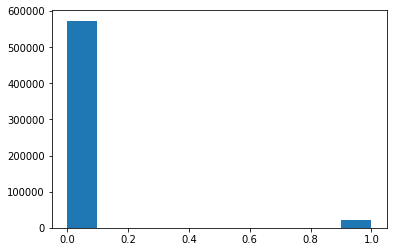

In [92]:
plt.hist(train.target)

### Feature Importance

In [100]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
features = train.drop(['id', 'target'],axis=1).columns.values
rf.fit(train.drop(['id', 'target'],axis=1), train.target)
for (i,j) in sorted(zip(features,rf.feature_importances_), key=lambda x: (None, x[1]),reverse=True):
    print('%20s : %.3f'%(i,j))

           ps_car_13 : 0.059
           ps_reg_03 : 0.051
           ps_car_14 : 0.041
          ps_calc_14 : 0.038
          ps_calc_10 : 0.037
          ps_calc_11 : 0.035
           ps_ind_15 : 0.033
           ps_ind_03 : 0.032
       ps_car_11_cat : 0.032
          ps_calc_01 : 0.031
          ps_calc_03 : 0.031
          ps_calc_02 : 0.031
          ps_calc_13 : 0.030
           ps_reg_02 : 0.029
          ps_calc_07 : 0.028
          ps_calc_08 : 0.028
          ps_calc_06 : 0.026
          ps_calc_09 : 0.026
           ps_car_15 : 0.026
          ps_calc_04 : 0.024
           ps_reg_01 : 0.024
          ps_calc_05 : 0.024
          ps_calc_12 : 0.024
       ps_car_06_cat : 0.024
           ps_ind_01 : 0.023
           ps_car_12 : 0.022
       ps_car_01_cat : 0.020
       ps_car_09_cat : 0.013
       ps_ind_02_cat : 0.012
           ps_car_11 : 0.011
       ps_car_05_cat : 0.010
      ps_calc_17_bin : 0.009
      ps_calc_19_bin : 0.009
       ps_ind_05_cat : 0.008
      ps_calc_